<a href="https://colab.research.google.com/github/estarada/prediction_movies_by_costs/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D0%BE%D0%B2_%D0%BF%D0%BE_%D1%80%D0%B0%D1%81%D1%85%D0%BE%D0%B4%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_start = pd.read_csv('/content/young-people-survey.csv')

In [ ]:
# data_start.info(verbose=True, show_counts=True)

In [ ]:
# Создание датафрейма с необходимыми для исследования признаками
df = data_start.iloc[:, list(range(19, 31)) + list(range(133, 140))]

In [ ]:
df.sample(7)

,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
802,5.0,3.0,3.0,5.0,4.0,4.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,3,3.0
842,5.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1.0,1,1.0
798,5.0,4.0,5.0,4.0,1.0,1.0,5.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,4.0,2.0,3.0,3,4.0
45,5.0,5.0,4.0,5.0,2.0,4.0,1.0,2.0,1.0,5.0,2.0,2.0,4.0,5.0,4.0,4.0,5.0,4,5.0
590,5.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,2.0,4.0,2.0,4.0,2.0,4.0,3.0,4,4.0
610,4.0,3.0,3.0,5.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,2,2.0
339,5.0,1.0,2.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,4.0,4.0,2.0,2.0,1,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Movies                      1004 non-null   float64
 1   Horror                      1008 non-null   float64
 2   Thriller                    1009 non-null   float64
 3   Comedy                      1007 non-null   float64
 4   Romantic                    1007 non-null   float64
 5   Sci-fi                      1008 non-null   float64
 6   War                         1008 non-null   float64
 7   Fantasy/Fairy tales         1007 non-null   float64
 8   Animated                    1007 non-null   float64
 9   Documentary                 1002 non-null   float64
 10  Western                     1006 non-null   float64
 11  Action                      1008 non-null   float64
 12  Finances                    1007 non-null   float64
 13  Shopping centres            1008 

Все выбранные параметры имеют значение от 1 до 5. Так как среди них нет типа object, можно работать дальше без преобразования категориальных признаков в числовые. Лишь преобразуем float в int для упрощения дальнейшей работы.

In [ ]:
df = df.astype(int, errors='ignore')

# Работа с пропусками в данных

In [ ]:
print(f"Размерность датафрейма:\n{df.shape[0]} строк\n{df.shape[1]} столбцов")

Размерность датафрейма:
1010 строк
19 столбцов


In [ ]:
# Данные о пропусках
df_isna_int = df.isna().sum()
df_isna_per = df_isna_int.apply(lambda val: '{:.1f}%'.format(val / df.shape[0] * 100))

df_isna = pd.concat([df_isna_int, df_isna_per], axis=1)
df_isna.columns = ['Пропуски', 'Доля']


In [ ]:
df_isna

,Пропуски,Доля
Movies,6,0.6%
Horror,2,0.2%
Thriller,1,0.1%
Comedy,3,0.3%
Romantic,3,0.3%
Sci-fi,2,0.2%
War,2,0.2%
Fantasy/Fairy tales,3,0.3%
Animated,3,0.3%
Documentary,8,0.8%


<Axes: >

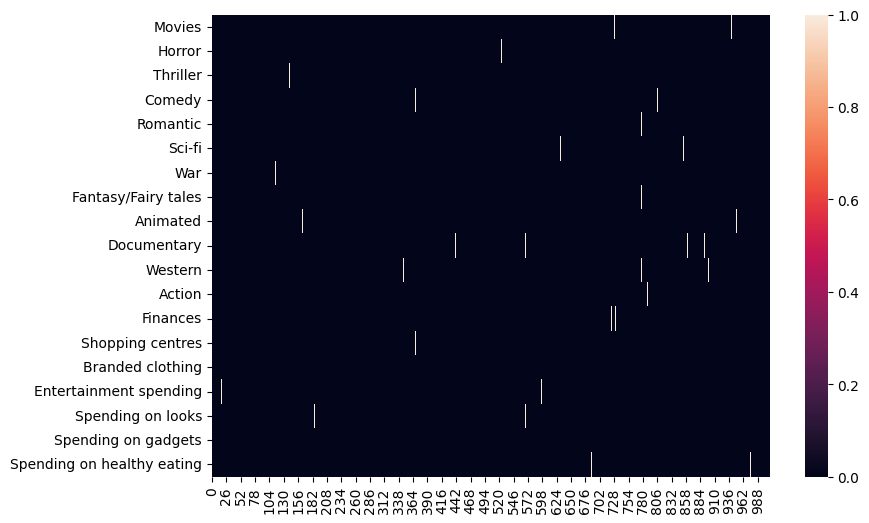

In [ ]:
# Визуализация пропусков в данных
plt.figure(figsize=(9, 6))
sns.heatmap(df.isna().transpose())

Как можно заметить, в исходных данных содержится малое количество пропусков. Также нет закономерности в наличии пропусков, они случайны. 
Поэтому удалить строки с пропусками будет являться рациональным решением, не имеющим значительного влияния на качество модели.

In [ ]:
# Удаление пропусков из датафрейма
df = df.dropna()
df.count()

Movies                        961
Horror                        961
Thriller                      961
Comedy                        961
Romantic                      961
Sci-fi                        961
War                           961
Fantasy/Fairy tales           961
Animated                      961
Documentary                   961
Western                       961
Action                        961
Finances                      961
Shopping centres              961
Branded clothing              961
Entertainment spending        961
Spending on looks             961
Spending on gadgets           961
Spending on healthy eating    961
dtype: int64

# Анализ исходных данных

In [ ]:
# Преобразование исходных данных в удобный для понимания вид
df_transformed = pd.DataFrame(columns=[1, 2, 3, 4, 5])
for col in df.columns:
  dict_values = df[col].value_counts().to_dict()
  df_transformed = pd.concat([df_transformed, pd.DataFrame([dict_values])], ignore_index=True)
df_transformed.index = [df.columns]

In [ ]:
# Распределение частот ответов респондентов
df_transformed = df_transformed.astype(int)
df_transformed

,1.0,2.0,3.0,4.0,5.0
Movies,3,10,72,193,683
Horror,247,191,202,166,155
Thriller,76,165,231,301,188
Comedy,4,22,82,234,619
Romantic,60,152,257,241,251
Sci-fi,132,202,241,199,187
War,138,190,244,176,213
Fantasy/Fairy tales,41,117,232,224,347
Animated,51,121,188,231,370
Documentary,42,120,249,288,262


In [ ]:
# Описательная статистика
df_described = df.describe().apply(lambda s: s.apply('{0:.2f}'.format)).transpose()
for col in df_described.columns:
  if col != 'mean' and col != 'std':
    df_described[col] = df_described[col].astype(float).astype(int)
df_described

,count,mean,std,min,25%,50%,75%,max
Movies,961,4.61,0.70,1,4,5,5,5
Horror,961,2.78,1.41,1,1,3,4,5
Thriller,961,3.37,1.20,1,2,4,4,5
Comedy,961,4.50,0.78,1,4,5,5,5
Romantic,961,3.49,1.21,1,3,4,5,5
Sci-fi,961,3.11,1.32,1,2,3,4,5
War,961,3.14,1.35,1,2,3,4,5
Fantasy/Fairy tales,961,3.75,1.19,1,3,4,5,5
Animated,961,3.78,1.23,1,3,4,5,5
Documentary,961,3.63,1.14,1,3,4,5,5


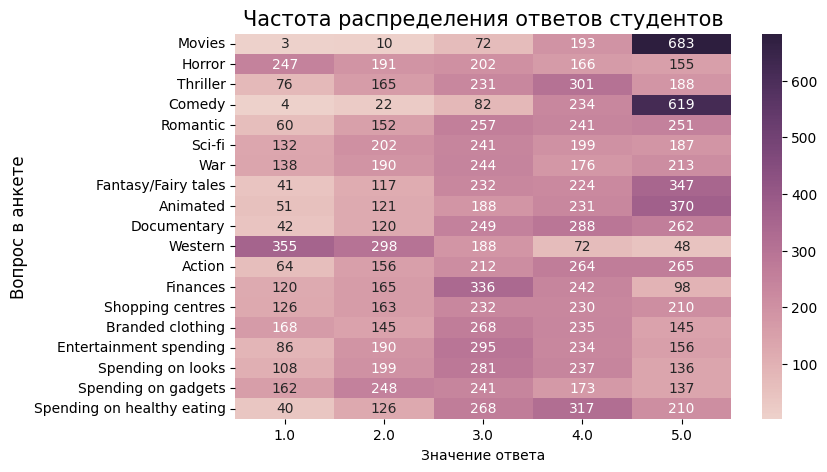

In [ ]:
# Визуализация с помощью heatmap()
plt.figure(figsize=(8, 5))
ax = sns.heatmap(df_transformed, annot=True, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

ax.set_title('Частота распределения ответов студентов', fontsize = 15)
plt.ylabel('Вопрос в анкете', fontsize=12)
plt.xlabel('Значение ответа')

plt.show()

Исходя из визуализации, можно установить, что большая часть студентов предпочитает смотреть фильмы. При этом любым жанром является комедия, затем идут мультфильмы, фэнтези, экшен, документальные и т.д. Более половины респондентов не смотрят жанр вестерн.

****
Что касается финансов, то наиболее частый ответ на вопрос о сохранении своих средств - "3", то есть студенты балансируют между сбережением средств и их полной растратой. Почти во всех категориях растрат наиболее частым ответом является "3". Это говорит о том, что опрошенные не стараются экономить на какой-то из категорий, но и стараются не тратить все деньги лишь на нее. Стоит отметить, что в меньшей степени наблюдается желание тратить деньги на гаджеты, и большей степени - на здоровое питание.



# Построение модели

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Разделение выборки на тренировочную и тестовую
train, test = train_test_split(df, test_size=0.2)

In [ ]:
# Размер выборок
print('train:', train.shape, '\ntest:', test.shape)

train: (768, 19) 
test: (193, 19)


In [ ]:
# # Фильмы -> расходы
# x_train, y_train = train.iloc[:, list(range(0, 12))], train.iloc[:, list(range(12, 19))]
# x_test, y_test = test.iloc[:, list(range(0, 12))], test.iloc[:, list(range(12, 19))]

# Расходы -> фильмы
y_train, x_train = train.iloc[:, list(range(0, 12))], train.iloc[:, list(range(12, 19))]
y_test, x_test = test.iloc[:, list(range(0, 12))], test.iloc[:, list(range(12, 19))]

In [ ]:
# Линейная модель
from sklearn.metrics import accuracy_score
import numpy as np

[Text(0, 0, '0.63'),
 Text(0, 0, '0.23'),
 Text(0, 0, '0.33'),
 Text(0, 0, '0.51'),
 Text(0, 0, '0.31'),
 Text(0, 0, '0.31'),
 Text(0, 0, '0.25'),
 Text(0, 0, '0.24'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.32'),
 Text(0, 0, '0.32'),
 Text(0, 0, '0.32')]

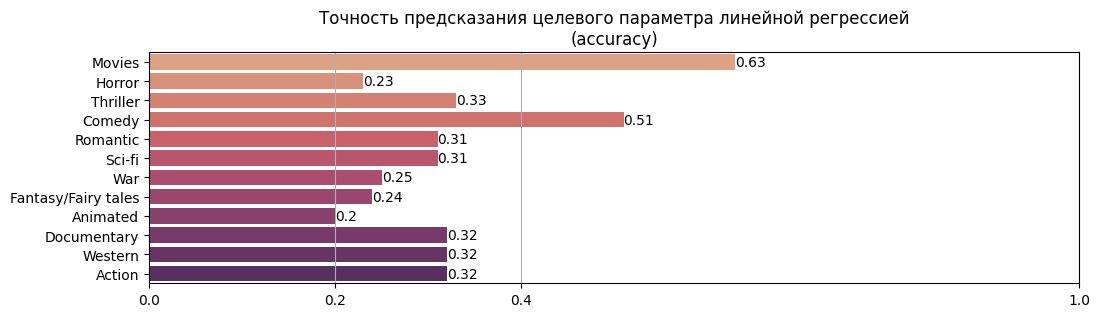

In [ ]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression

model = LinearRegression()
accuracy_dict = {}
for i in range(y_test.shape[1]):
  model.fit(x_train, y_train.iloc[:,i])
  final = model.predict(x_test)
  final = np.around(final, 0)
  accuracy_dict[f'{y_test.iloc[:,i].name}'] = (round(accuracy_score(y_test.iloc[:,i], final),2))

fig, ax = plt.subplots(figsize=(12,3))
sns.barplot(data=pd.DataFrame(accuracy_dict, index=[0]), orient='h', palette="flare")
ax.set_title('Точность предсказания целевого параметра линейной регрессией\n(accuracy)')
ax.set_xlim(0, 1)
ax.grid(axis='x')
ax.set_xticks([0, 0.2, 0.4, 1])
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '0.68'),
 Text(0, 0, '0.22'),
 Text(0, 0, '0.27'),
 Text(0, 0, '0.61'),
 Text(0, 0, '0.28'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.23'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.33'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.32'),
 Text(0, 0, '0.26')]

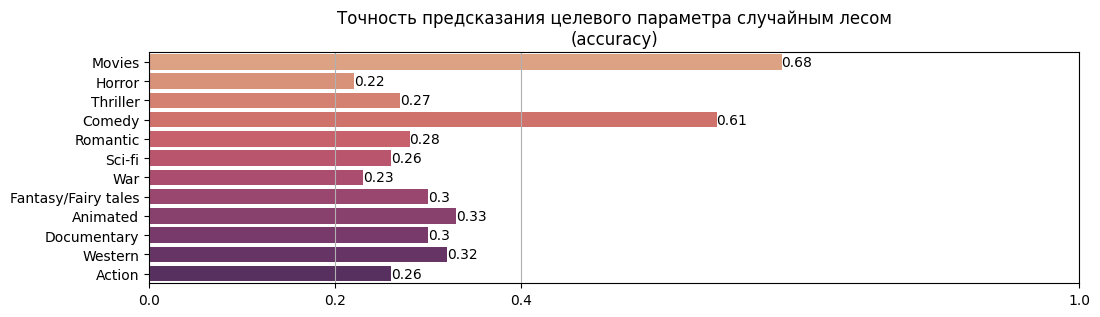

In [ ]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=15)
accuracy_dict = {}
for i in range(y_test.shape[1]):
  model.fit(x_train, y_train.iloc[:,i])
  final = model.predict(x_test)
  final = np.around(final, 0)
  accuracy_dict[f'{y_test.iloc[:,i].name}'] = (round(accuracy_score(y_test.iloc[:,i], final),2))

fig, ax = plt.subplots(figsize=(12,3))
sns.barplot(data=pd.DataFrame(accuracy_dict, index=[0]), orient='h', palette="flare")
ax.set_title('Точность предсказания целевого параметра случайным лесом\n(accuracy)')
ax.set_xlim(0, 1)
ax.grid(axis='x')
ax.set_xticks([0, 0.2, 0.4, 1])
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '0.69'),
 Text(0, 0, '0.23'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.63'),
 Text(0, 0, '0.33'),
 Text(0, 0, '0.24'),
 Text(0, 0, '0.26'),
 Text(0, 0, '0.35'),
 Text(0, 0, '0.41'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.36'),
 Text(0, 0, '0.29')]

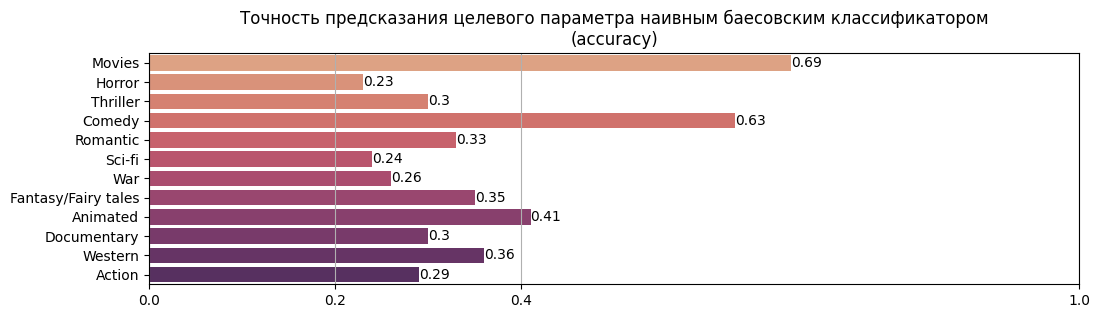

In [ ]:
# Наивный Баесовский классификатор
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
accuracy_dict = {}
for i in range(y_test.shape[1]):
  model.fit(x_train, y_train.iloc[:,i])
  final = model.predict(x_test)
  final = np.around(final, 0)

  accuracy_dict[f'{y_test.iloc[:,i].name}'] = (round(accuracy_score(y_test.iloc[:,i], final),2))

fig, ax = plt.subplots(figsize=(12,3))
sns.barplot(data=pd.DataFrame(accuracy_dict, index=[0]), orient='h', palette="flare")
ax.set_title('Точность предсказания целевого параметра наивным баесовским классификатором\n(accuracy)')
ax.set_xlim(0, 1)
ax.grid(axis='x')
ax.set_xticks([0, 0.2, 0.4, 1])
ax.bar_label(ax.containers[0], label_type='edge')